In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:

# Task 1: Load and Explore the Dataset

try:
    print(" Loading the Iris dataset...")
    iris = load_iris()

    # Convert to pandas DataFrame
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    print("\n Dataset loaded successfully!")
    print("\n--- First 5 Rows ---")
    print(df.head())

    print("\n--- Dataset Info ---")
    print(df.info())

    print("\n--- Missing Values ---")
    print(df.isnull().sum())


    df = df.dropna() 
    print("\n Dataset cleaned: No missing values found.")
          
except FileNotFoundError:
    print(" Error: Dataset file not found.")
except Exception as e:
    print(f" An error occurred: {e}")




 Loading the Iris dataset...

 Dataset loaded successfully!

--- First 5 Rows ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 


In [4]:
# Task 2: Basic Data Analysis

try:
    print("\n--- Basic Statistics (Numerical Columns) ---")
    print(df.describe())

    print("\n--- Grouped Analysis: Mean Petal Length by Species ---")
    grouped = df.groupby('species')['petal length (cm)'].mean()
    print(grouped)

    # No missing values in Iris, but we'll handle if any existed
    df = df.dropna() 

    print("\n Dataset cleaned: No missing values found.")

    # Task 2: Basic Data Analysis
    print("\n--- Basic Statistics (Numerical Columns) ---")
    print(df.describe())

    print("\n--- Grouped Analysis: Mean Petal Length by Species ---")
    grouped = df.groupby('species')['petal length (cm)'].mean()
    print(grouped)
    
except Exception as e:
    print(f" An error occurred: {e}")


--- Basic Statistics (Numerical Columns) ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

--- Grouped Analysis: Mean Petal Length by Species ---
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: peta

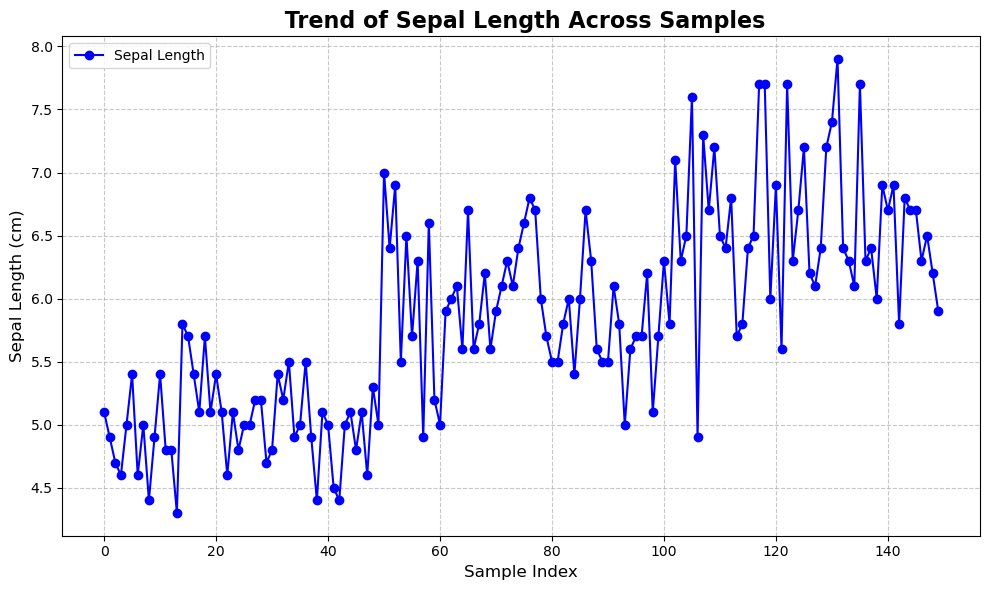

In [5]:
# Task 3: Data Visualization (4 Plots)

# 1. Line Chart: Trend of sepal length across samples (simulating time-like order)

try:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['sepal length (cm)'], marker='o', linestyle='-', color='blue', label='Sepal Length')
    plt.title(' Trend of Sepal Length Across Samples', fontsize=16, fontweight='bold')
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Sepal Length (cm)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" An error occurred: {e}")

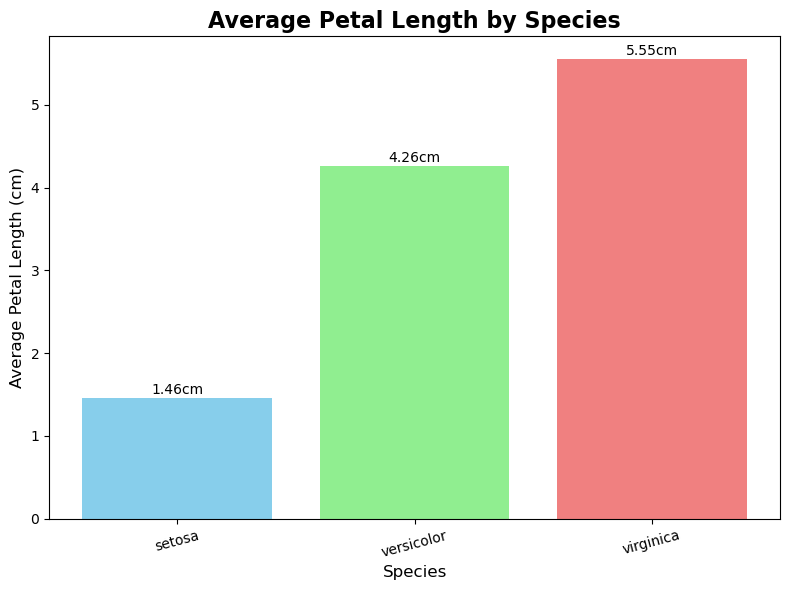

In [6]:
# 2. Bar Chart: Average petal length per species

try:
    plt.figure(figsize=(8, 6))
    bars = plt.bar(grouped.index, grouped.values, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title('Average Petal Length by Species', fontsize=16, fontweight='bold')
    plt.xlabel('Species', fontsize=12)
    plt.ylabel('Average Petal Length (cm)', fontsize=12)
    plt.xticks(rotation=15)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}cm', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" An error occurred: {e}")

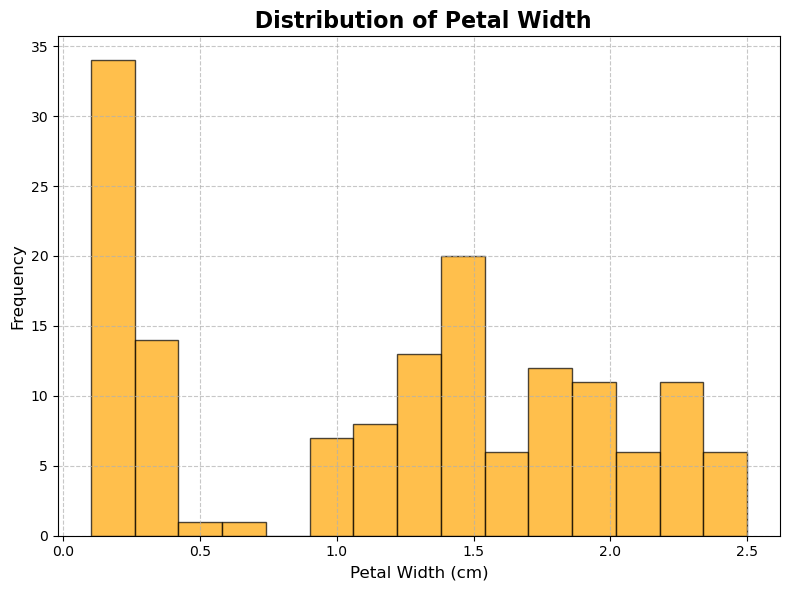

In [7]:
# 3. Histogram: Distribution of petal width

try:
    plt.figure(figsize=(8, 6))
    plt.hist(df['petal width (cm)'], bins=15, color='orange', edgecolor='black', alpha=0.7)
    plt.title(' Distribution of Petal Width', fontsize=16, fontweight='bold')
    plt.xlabel('Petal Width (cm)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" An error occurred: {e}")

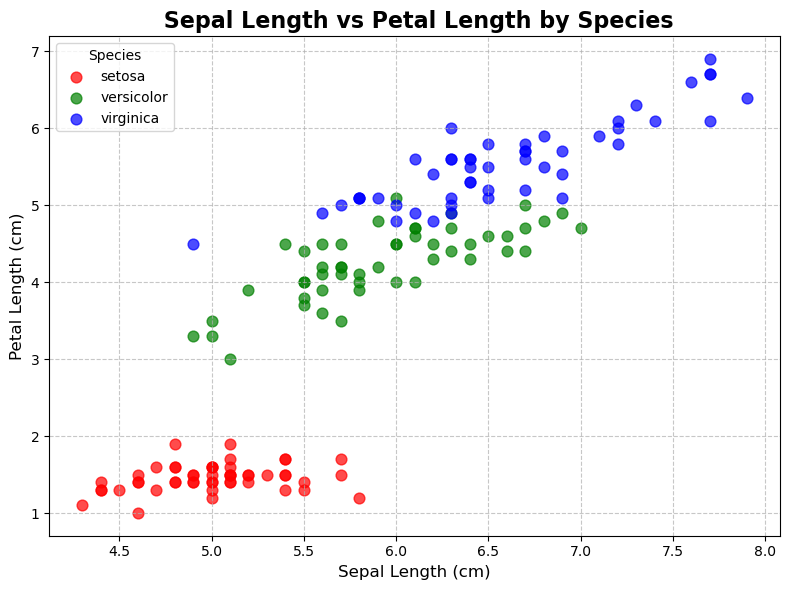

In [8]:
# 4. Scatter Plot: Sepal length vs Petal length
try:
    
    plt.figure(figsize=(8, 6))
    colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'],
                    c=colors[species], label=species, alpha=0.7, s=60)
    plt.title(' Sepal Length vs Petal Length by Species', fontsize=16, fontweight='bold')
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Petal Length (cm)', fontsize=12)
    plt.legend(title='Species')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" An error occurred: {e}")

In [9]:
print("\n All visualizations generated successfully!")


 All visualizations generated successfully!
